## 1.先import csv模組，然後打開查看iris資料集

In [33]:
import csv

In [34]:
with open('iris/iris.csv', newline='') as csvfile:

  rows = csv.reader(csvfile)

  for row in rows:
    print(row)

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
['1', '5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
['2', '4.9', '3.0', '1.4', '0.2', 'Iris-setosa']
['3', '4.7', '3.2', '1.3', '0.2', 'Iris-setosa']
['4', '4.6', '3.1', '1.5', '0.2', 'Iris-setosa']
['5', '5.0', '3.6', '1.4', '0.2', 'Iris-setosa']
['6', '5.4', '3.9', '1.7', '0.4', 'Iris-setosa']
['7', '4.6', '3.4', '1.4', '0.3', 'Iris-setosa']
['8', '5.0', '3.4', '1.5', '0.2', 'Iris-setosa']
['9', '4.4', '2.9', '1.4', '0.2', 'Iris-setosa']
['10', '4.9', '3.1', '1.5', '0.1', 'Iris-setosa']
['11', '5.4', '3.7', '1.5', '0.2', 'Iris-setosa']
['12', '4.8', '3.4', '1.6', '0.2', 'Iris-setosa']
['13', '4.8', '3.0', '1.4', '0.1', 'Iris-setosa']
['14', '4.3', '3.0', '1.1', '0.1', 'Iris-setosa']
['15', '5.8', '4.0', '1.2', '0.2', 'Iris-setosa']
['16', '5.7', '4.4', '1.5', '0.4', 'Iris-setosa']
['17', '5.4', '3.9', '1.3', '0.4', 'Iris-setosa']
['18', '5.1', '3.5', '1.4', '0.3', 'Iris-setosa']
['19', '5.7', '3.8', '1.7

## 2.介紹：
### iris資料集裡面塞的是總共150筆的3種鳶尾花，每筆資料記載有以下資訊：
#### {SepalLength(花萼長度)、SepalWidth(花萼寬度)、PetalLength(花瓣長度)、PetalWidth(花瓣寬度)、Sepcies(鳶尾花品種)}

##  3.資料預處理
### 運用pandas處理csv檔案

In [35]:
import pandas as pd
import numpy as np
from io import StringIO

In [36]:
iris = pd.read_csv('iris/iris.csv')

In [37]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 用X來儲存鳶尾花的長度、寬度等資料，當作Feature特徵值。
### 用Y來儲存鳶尾花的品種名稱，當作Label資料類別。

In [38]:
X = iris.drop(columns=['Id','Species'])
Y = iris.drop(columns=['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

In [39]:
Y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


### 將X與Y做訓練與測試資料的切割。

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3)

In [41]:
Y_train

,Species
137,Iris-virginica
123,Iris-virginica
102,Iris-virginica
47,Iris-setosa
65,Iris-versicolor
...,...
149,Iris-virginica
109,Iris-virginica
146,Iris-virginica
91,Iris-versicolor


### 將Y的訓練與測試資料做OneHotEncoding。
#### 這裡運用pandas模組的get_dummies方法。
#### get_dummies()與OneHotEncoder()差別在於，get_dummies可以直接轉換字串為0,1；
#### 而OneHotEncoder()轉換字串需要先進行Label Encoding。

#### 資料來源：https://reurl.cc/E7jNa1  -->使用Pandas進行One hot encoding章節

In [42]:
from keras.utils import np_utils
from sklearn.preprocessing import OneHotEncoder

Y_train_OneHot = pd.get_dummies(Y_train)
Y_test_OneHot = pd.get_dummies(Y_test)

In [43]:
pd.DataFrame(Y_test_OneHot)

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
14,1,0,0
144,0,0,1
59,0,1,0
87,0,1,0
42,1,0,0
27,1,0,0
82,0,1,0
108,0,0,1
24,1,0,0
130,0,0,1


### X_train、X_test標準化

In [44]:
X_train_normalize = X_train / 255
X_test_normalize = X_test / 255
len(X_test_normalize)

45

## 4.建立模型
### 匯入模組

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [46]:
model = Sequential()

### 建立輸入層

In [47]:
model.add(Dense(units=10000,input_dim=4,kernel_initializer='normal',activation='relu'))

In [48]:
X_train_normalize.values.shape
#model.add(Dropout(0.5))

(105, 4)

### 建立輸出層

In [49]:
model.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))

## 開始訓練

In [50]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [51]:
train_history = model.fit(x=X_train_normalize.values,y=Y_train_OneHot.values,validation_split=0.3,epochs=100,batch_size=20,verbose=2)

Train on 73 samples, validate on 32 samples
Epoch 1/100
 - 0s - loss: 1.1065 - accuracy: 0.3014 - val_loss: 1.1058 - val_accuracy: 0.2188
Epoch 2/100
 - 0s - loss: 1.0740 - accuracy: 0.3973 - val_loss: 1.1487 - val_accuracy: 0.2188
Epoch 3/100
 - 0s - loss: 1.0653 - accuracy: 0.3836 - val_loss: 1.1593 - val_accuracy: 0.2188
Epoch 4/100
 - 0s - loss: 1.0659 - accuracy: 0.3836 - val_loss: 1.1489 - val_accuracy: 0.2188
Epoch 5/100
 - 0s - loss: 1.0582 - accuracy: 0.3836 - val_loss: 1.1288 - val_accuracy: 0.2188
Epoch 6/100
 - 0s - loss: 1.0506 - accuracy: 0.3836 - val_loss: 1.0971 - val_accuracy: 0.2188
Epoch 7/100
 - 0s - loss: 1.0479 - accuracy: 0.3836 - val_loss: 1.0664 - val_accuracy: 0.2188
Epoch 8/100
 - 0s - loss: 1.0405 - accuracy: 0.3836 - val_loss: 1.0616 - val_accuracy: 0.2812
Epoch 9/100
 - 0s - loss: 1.0328 - accuracy: 0.3973 - val_loss: 1.0685 - val_accuracy: 0.4688
Epoch 10/100
 - 0s - loss: 1.0288 - accuracy: 0.4932 - val_loss: 1.0738 - val_accuracy: 0.2812
Epoch 11/100
 -

Epoch 87/100
 - 0s - loss: 0.3799 - accuracy: 0.9863 - val_loss: 0.2860 - val_accuracy: 0.9688
Epoch 88/100
 - 0s - loss: 0.3795 - accuracy: 0.9315 - val_loss: 0.2879 - val_accuracy: 0.9688
Epoch 89/100
 - 0s - loss: 0.3742 - accuracy: 0.9726 - val_loss: 0.2908 - val_accuracy: 0.9688
Epoch 90/100
 - 0s - loss: 0.3731 - accuracy: 0.9726 - val_loss: 0.2780 - val_accuracy: 0.9688
Epoch 91/100
 - 0s - loss: 0.3700 - accuracy: 0.9315 - val_loss: 0.2829 - val_accuracy: 0.9375
Epoch 92/100
 - 0s - loss: 0.3684 - accuracy: 0.9452 - val_loss: 0.2906 - val_accuracy: 0.9688
Epoch 93/100
 - 0s - loss: 0.3626 - accuracy: 0.9726 - val_loss: 0.2609 - val_accuracy: 0.9375
Epoch 94/100
 - 0s - loss: 0.3662 - accuracy: 0.9452 - val_loss: 0.2615 - val_accuracy: 0.9688
Epoch 95/100
 - 0s - loss: 0.3505 - accuracy: 0.9863 - val_loss: 0.2742 - val_accuracy: 0.9688
Epoch 96/100
 - 0s - loss: 0.3585 - accuracy: 0.9041 - val_loss: 0.2651 - val_accuracy: 0.9375
Epoch 97/100
 - 0s - loss: 0.3481 - accuracy: 0.94

### 用圖檢視

In [52]:
import matplotlib.pyplot as plt
def show_train(train_history,accuracy,validation):
    plt.plot(train_history.history[accuracy])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(accuracy)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

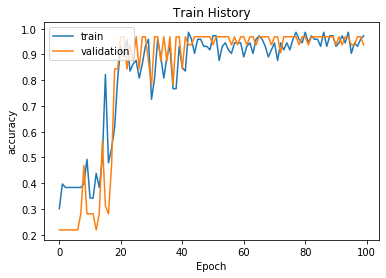

In [53]:
show_train(train_history,'accuracy','val_accuracy')